# Introduction

Houses prices is a small standard Regression problem, the data set was token from a kaggle competition, formatted in the AutoML format.

In [1]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
import seaborn as sns; sns.set()

# Step 1: Exploratory data analysis

We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.


In [2]:
datadir = 'public_data/'             
basename = 'houseprice'
!ls $datadir*

public_data/houseprice_feat.name      public_data/houseprice_train.data
public_data/houseprice_label.name     public_data/houseprice_train.solution
public_data/houseprice_public.info    public_data/houseprice_valid.data
public_data/houseprice_test.data      public_data/houseprice_valid.solution
public_data/houseprice_test.solution


In [3]:
# We read data as Panda data frames
feat_name = pd.read_csv(datadir+basename + '_feat.name', header=None)
label_name = pd.read_csv(datadir+basename + '_label.name', header=None)


X = pd.read_csv(datadir+basename + '_train.data', sep=' ', names = np.ravel(feat_name))
Y = pd.read_csv(datadir+ basename + '_train.solution', sep=' ', names = np.ravel(label_name))



X_valid = pd.read_csv(datadir+basename + '_valid.data', sep=' ', names = np.ravel(feat_name))
Y_valid = pd.read_csv(datadir+ basename + '_valid.solution', sep=' ', names = np.ravel(label_name))
X_test = pd.read_csv(datadir+basename + '_test.data', sep=' ', names = np.ravel(feat_name))
Y_test = pd.read_csv(datadir+ basename + '_test.solution', sep=' ', names = np.ravel(label_name))



X['waterfront'] = X['waterfront'].astype('category',ordered=True)
X['view'] = X['view'].astype('category',ordered=True)
X['condition'] = X['condition'].astype('category',ordered=True)
X['grade'] = X['grade'].astype('category',ordered=False)


X_valid['waterfront'] = X_valid['waterfront'].astype('category',ordered=True)
X_valid['view'] = X_valid['view'].astype('category',ordered=True)
X_valid['condition'] = X_valid['condition'].astype('category',ordered=True)
X_valid['grade'] = X_valid['grade'].astype('category',ordered=False)


X_test['waterfront'] = X_test['waterfront'].astype('category',ordered=True)
X_test['view'] = X_test['view'].astype('category',ordered=True)
X_test['condition'] = X_test['condition'].astype('category',ordered=True)
X_test['grade'] = X_test['grade'].astype('category',ordered=False)

[patnum, featnum] = X.shape
[patnum2, classnum] = Y.shape
assert(patnum==patnum2)
print 'Number of examples = %d' % patnum
print 'Number of features = %d' % featnum
print 'Number of variables to predict = %d' % classnum

Number of examples = 12967
Number of features = 18
Number of variables to predict = 1


/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:

In [4]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,12967.000000,12967.0,12967.000000
mean,1748.221177,1.700933,3.447289,302.674404,13276.086065,1974.819696,0.007403,0.236909,1.381430,1.577829e+04,3.361996,98077.842600,47.0,1967.422457
std,807.951361,0.724200,0.667537,450.478681,27260.086285,673.559639,0.085727,0.766621,0.520255,4.282275e+04,0.910324,53.935206,0.0,27.884628
min,380.000000,0.000000,1.000000,0.000000,660.000000,460.000000,0.000000,0.000000,1.000000,5.720000e+02,0.000000,98001.000000,47.0,1900.000000
25%,1180.000000,1.000000,3.000000,0.000000,5444.500000,1490.000000,0.000000,0.000000,1.000000,5.444500e+03,3.000000,98033.000000,47.0,1950.000000
50%,1530.000000,2.000000,3.000000,0.000000,7828.000000,1830.000000,0.000000,0.000000,1.000000,7.900000e+03,3.000000,98065.000000,47.0,1969.000000
75%,2130.000000,2.000000,4.000000,600.000000,10310.000000,2340.000000,0.000000,0.000000,2.000000,1.105400e+04,4.000000,98118.000000,47.0,1990.000000
max,9410.000000,8.000000,5.000000,4820.000000,871200.000000,6110.000000,1.000000,4.000000,3.000000,1.651359e+06,11.000000,98199.000000,47.0,2015.000000


In [5]:
Y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [6]:
# Here we add the target values as a last column, this is convenient to use seaborn
numerical_target = Y['price'] 

XY = X.assign(price=numerical_target.values) 


Let's first display the distribution of the target column (price) using a boxplot.

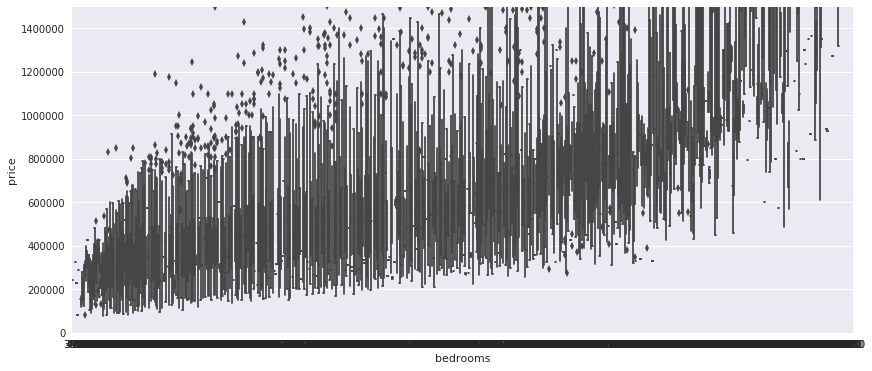

In [7]:
var = 'bedrooms'
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y='price', data=XY)
fig.axis(ymin=0, ymax=1500000);


we can also use a histogram for our target variable

(-0.5, 724.5, 0, 1750000)

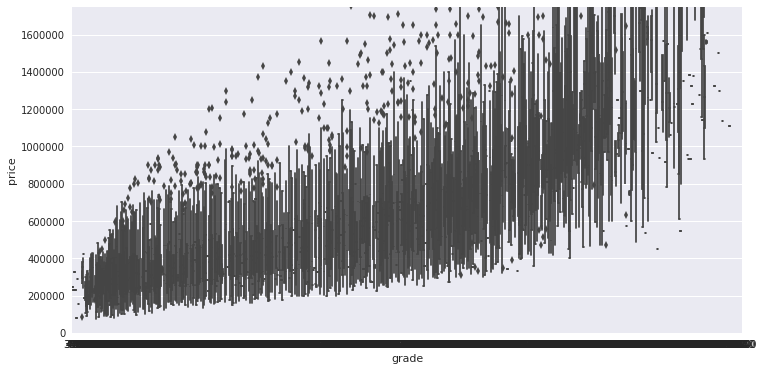

In [8]:
var = 'grade'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y='price', data=XY)
fig.axis(ymin=0, ymax=1750000)

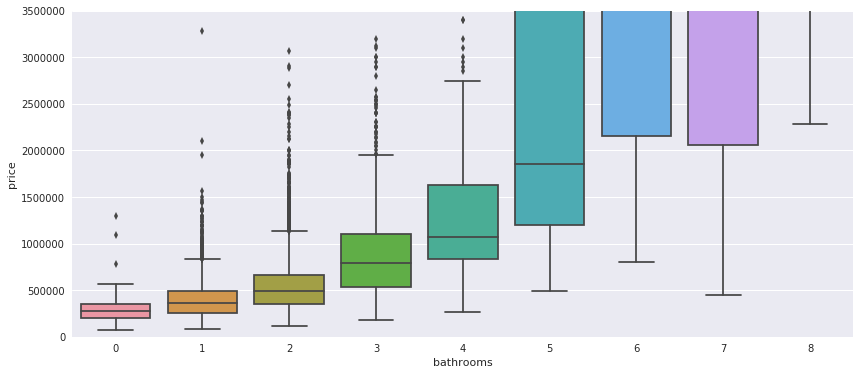

In [9]:
var = 'bathrooms'
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=XY)
fig.axis(ymin=0, ymax=3500000);

(array([4.924e+03, 5.345e+03, 1.814e+03, 4.360e+02, 2.110e+02, 1.070e+02,
        4.000e+01, 3.300e+01, 1.700e+01, 1.700e+01, 7.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00]),
 array([  75000.,  380000.,  685000.,  990000., 1295000., 1600000.,
        1905000., 2210000., 2515000., 2820000., 3125000., 3430000.,
        3735000., 4040000., 4345000., 4650000., 4955000., 5260000.,
        5565000., 5870000., 6175000., 6480000., 6785000., 7090000.,
        7395000., 7700000.]),
 <a list of 25 Patch objects>)

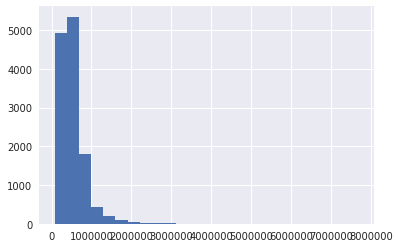

In [10]:
plt.hist(XY.price, bins = 25)

Immediately, we notice that the distribution is skewed towards cheaper homes. To make the distribution more symmetric, we can use its logarithm:

(array([  10.,   14.,   38.,   88.,  216.,  649., 1129., 1563., 1587.,
        1895., 1753., 1419., 1098.,  678.,  287.,  236.,  139.,   65.,
          48.,   27.,   14.,    4.,    5.,    2.,    3.]),
 array([11.22524339, 11.41050289, 11.59576239, 11.78102189, 11.96628139,
        12.15154089, 12.33680039, 12.52205989, 12.70731939, 12.89257889,
        13.07783839, 13.26309789, 13.44835739, 13.63361689, 13.81887639,
        14.00413589, 14.18939539, 14.37465489, 14.55991439, 14.74517389,
        14.93043339, 15.11569289, 15.30095239, 15.48621189, 15.67147139,
        15.85673089]),
 <a list of 25 Patch objects>)

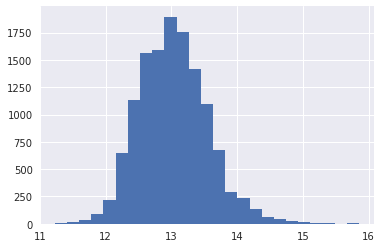

In [11]:
plt.hist(np.log(XY.price), bins = 25)

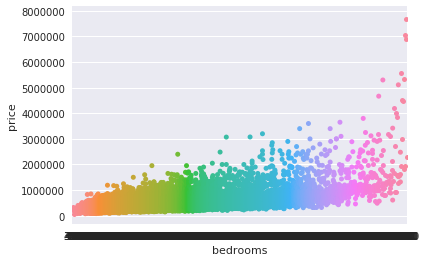

In [12]:
sns.stripplot(x='bedrooms', y='price',data=XY)

The graph indicates that the relation of price with bedrooms. Price goes up with number of bedrooms upto 6 and then comes down as no of bedrooms increase.

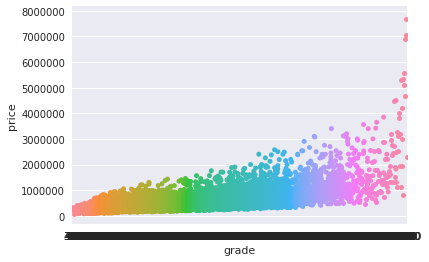

In [13]:
sns.stripplot(x='grade', y='price',data=XY, size=5)


Price of the house is dependent on grade of the house, higher the grade higher the price.

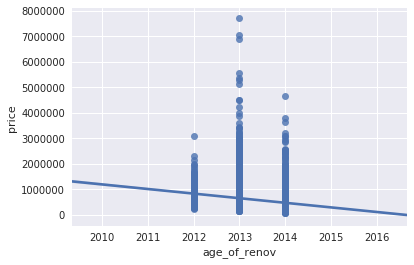

In [14]:
df=XY
df['age_of_renov'] = 100
df.loc[df['yr_renovated'] != 0,'age_of_renov'] = 2015-df.loc[df['yr_renovated'] != 0,'yr_renovated']

sns.regplot(x='age_of_renov',y='price',data=XY)

the relation between the price and age of renovation

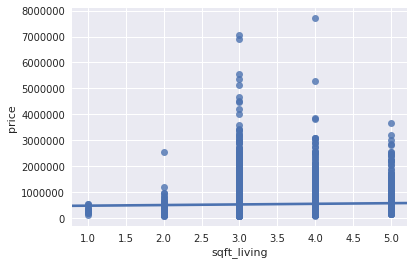

In [15]:
sns.regplot(x='sqft_living',y='price',data=XY)

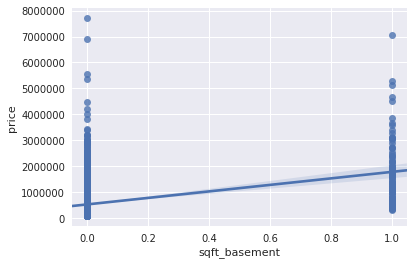

In [16]:
sns.regplot(x='sqft_basement',y='price',data=XY)

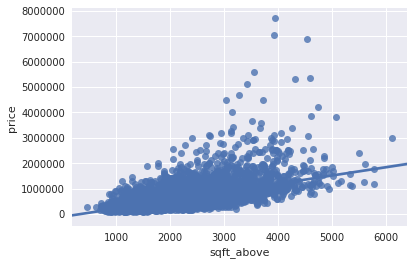

In [17]:
sns.regplot(x='sqft_above',y='price',data=XY)


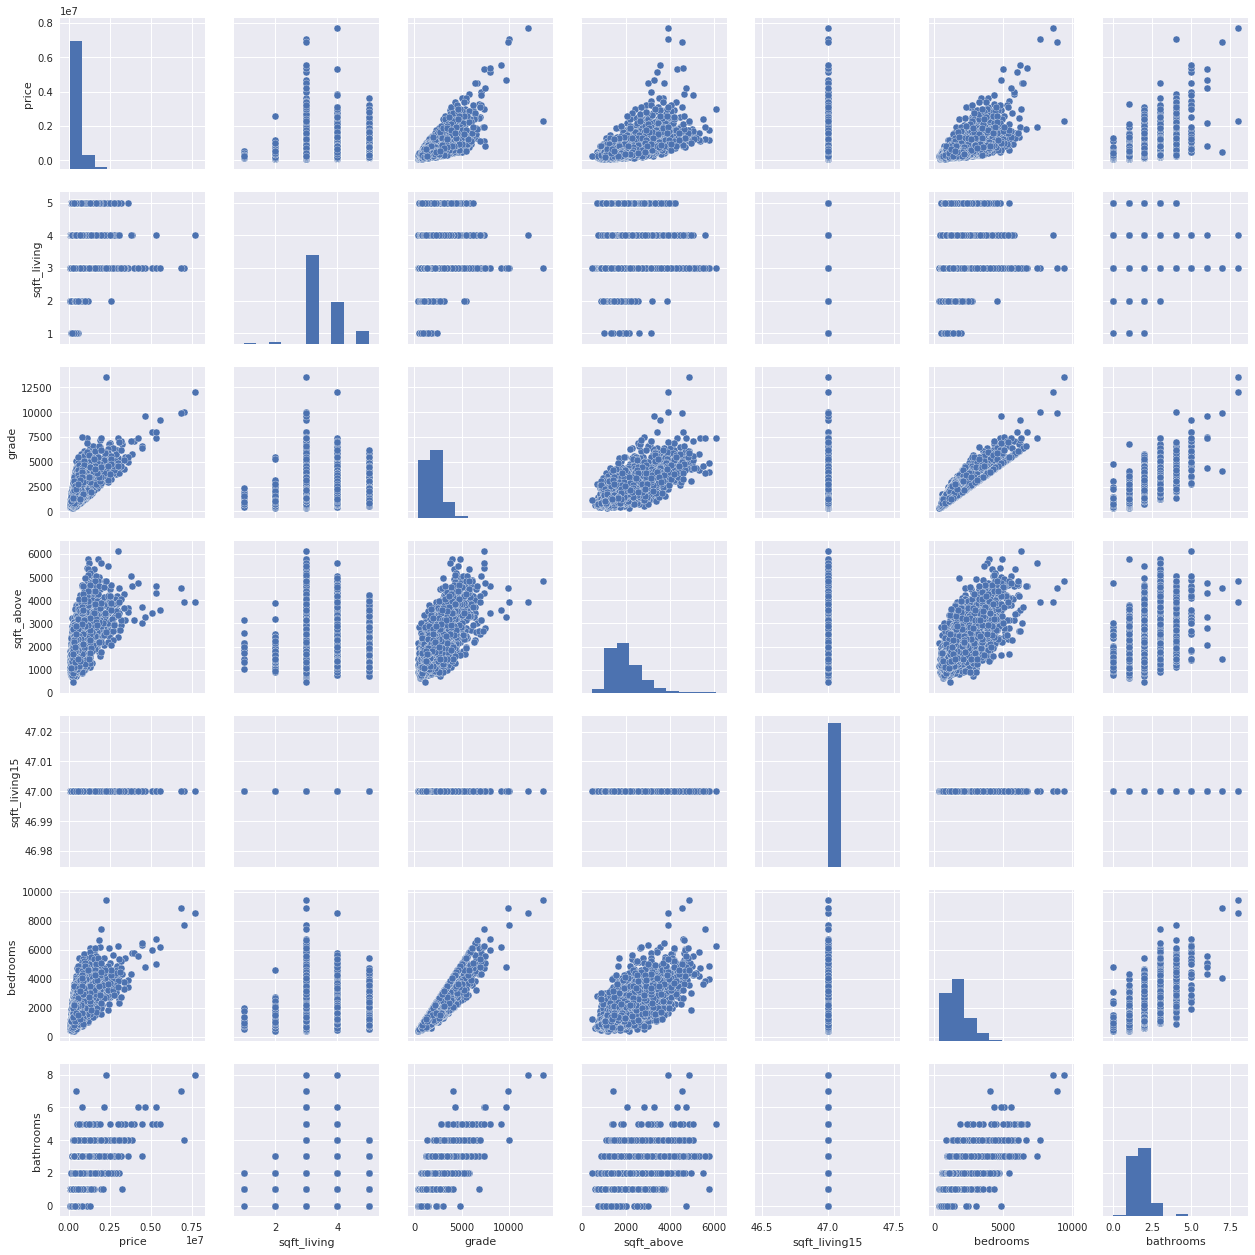

In [18]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bedrooms','bathrooms']
sns.pairplot(XY[cols], size = 2.5,  palette='afmhot')
plt.show();

# Building predictive models
The initial classifier in your sandbox.



In [19]:
X = X.values
y=numerical_target 

X_test = X_test.values
y_test=Y_test['price']

X_valid = X_valid.values
y_valid=Y_valid['price']

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor

class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = linear_model.LinearRegression()

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

In [20]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold # import KFold
from numpy import zeros, mean

kf = KFold(n_splits=3,random_state=1) # Define the split - into 2 folds 
i=0
scores = zeros(3)

    
for idx_t, idx_v in kf.split(X):
    Xtr = X[idx_t]
    Ytr = y[idx_t]
   
    Xva = X[idx_v]
    Yva = y[idx_v]
    clf = Classifier()
    clf.fit(Xtr, Ytr)
    Y_predict = clf.predict(Xva)
    scores[i] =r2_score(Yva,Y_predict )
    print 'Fold', i+1, 'R2 score metric = ', scores[i]
    i=i+1
print 'Average score = ', mean(scores)

Fold 1 R2 score metric =  0.6620946839312067
Fold 2 R2 score metric =  0.6538249327200034
Fold 3 R2 score metric =  0.6444493404562694
Average score =  0.6534563190358266


/home/sam/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

# This will perform 2-fold cross-validation
# for 0.18 version or newer, use:
from sklearn.model_selection import cross_val_score

# for pre-0.18 versions of scikit, use:
from sklearn.cross_validation import cross_val_score


scores = cross_val_score(linear_model.LinearRegression(), X, y, cv=3)
print scores

[0.66209468 0.65382493 0.64444934]


In [22]:
outdir = 'sample_result_submission'

In [23]:
from model import model

In [24]:
M = model()
trained_model_name = model_dir + basename
M = M.load(trained_model_name)

In [25]:
if not(M.is_trained):
    X_train = X
    Y_train = numerical_target
    M.fit(X_train, Y_train)  
Y_hat_train = M.predict(X) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(X_valid)
Y_hat_test = M.predict(X_test)




FIT: dim(X)= [12967, 18]
FIT: dim(y)= [12967, 1]
PREDICT: dim(X)= [12967, 18]
PREDICT: dim(y)= [12967, 1]
PREDICT: dim(X)= [4322, 18]
PREDICT: dim(y)= [4322, 1]
PREDICT: dim(X)= [4324, 18]
PREDICT: dim(y)= [4324, 1]


Save the trained model (will be ready to reload next time around) and save the prediction results:

In [26]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + basename
#import os
#os.write(result_name + '_valid.predict', Y_hat_valid)
#os.write(result_name + '_test.predict', Y_hat_test)
#!ls $result_name*

# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [27]:
outdir = 'sample_result_submission'

In [28]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/public_data
Using output_dir: /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/sample_result_submission
Using program_dir: /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/ingestion_program
Using submission_dir: /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Houseprice ********
************************************************
========= Reading and converting data ==========
Info file found : /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/public_data/houseprice_public.info
========= Reading /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/public_data/houseprice_feat.type
[+] Success in  0.00 sec
========= Reading /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_k

# Making submission

In [29]:
outdir = 'sample_result_submission'
!python2 $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/public_data
Using output_dir: /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/sample_result_submission
Using program_dir: /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/ingestion_program
Using submission_dir: /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Houseprice ********
************************************************
========= Reading and converting data ==========
Info file found : /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/public_data/houseprice_public.info
========= Reading /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_kit/public_data/houseprice_feat.type
[+] Success in  0.00 sec
========= Reading /mnt/c/Users/snfdi/Documents/mini_projet/houseprice_starting_k